In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use("seaborn")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, matthews_corrcoef, f1_score, cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [3]:
seed = 1

In [5]:
df = pd.read_csv(r"PubChemfingerprints.csv")
df

,Name,pKi,Activity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_105 smiles_1,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_105 smiles_2,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_105 smiles_3,7.853872,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_105 smiles_4,7.698970,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_105 smiles_5,7.677781,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,AUTOGEN_105 smiles_101,7.772113,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,AUTOGEN_105 smiles_102,7.863279,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,AUTOGEN_105 smiles_103,7.602060,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,AUTOGEN_105 smiles_104,8.214670,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(105, 884)

In [7]:
df.describe()

,pKi,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
count,105.000000,105.0,105.0,105.000000,105.0,105.0,105.0,105.0,105.0,105.0,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
mean,7.281185,1.0,1.0,0.990476,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.762017,0.0,0.0,0.097590,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.737549,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6.080922,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,7.696804,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8.431798,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,11.638272,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.head()

,Name,pKi,Activity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_105 smiles_1,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_105 smiles_2,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_105 smiles_3,7.853872,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_105 smiles_4,7.698970,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_105 smiles_5,7.677781,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
classes=df['Activity'].unique()
classes

array(['Active', 'Inactive'], dtype=object)

In [10]:
df["Activity"].value_counts()

Activity
Active      69
Inactive    36
Name: count, dtype: int64

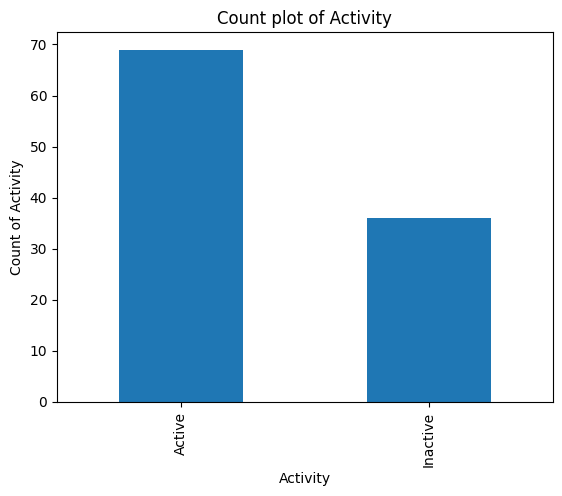

In [11]:
df['Activity'].value_counts().plot.bar()
plt.xlabel("Activity")
plt.ylabel("Count of Activity")
plt.title("Count plot of Activity")
plt.show()

In [12]:
print(df.columns)

Index(['Name', 'pKi', 'Activity', 'PubchemFP0', 'PubchemFP1', 'PubchemFP2',
       'PubchemFP3', 'PubchemFP4', 'PubchemFP5', 'PubchemFP6',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=884)


In [13]:
df.isnull().sum().sum()

0

In [14]:
df1 = df.drop(['pKi', 'Activity', 'Name'], axis=1)
df1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
102,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Drop all rows with missin data
## df = df.dropna()

In [16]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
## cols_to_drop = ['Name', 'Ticket', 'Cabin']
## df = df.drop(cols_to_drop, axis=1)

In [17]:
# Assuming X contains features (fingerprints) and y contains labels (WT Inhibition (%))
X = df.drop(['pKi', 'Activity', 'Name'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
102,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y_1= df['pKi']
Y_1

0      7.920819
1      7.920819
2      7.853872
3      7.698970
4      7.677781
         ...   
100    7.772113
101    7.863279
102    7.602060
103    8.214670
104    7.978811
Name: pKi, Length: 105, dtype: float64

In [19]:
# 2. Convert the target variable to binary labels based on the threshold
threshold = 7  # Threshold of 50%
Y = (Y_1 >= threshold).astype(int)
Y

0      1
1      1
2      1
3      1
4      1
      ..
100    1
101    1
102    1
103    1
104    1
Name: pKi, Length: 105, dtype: int32

In [20]:
Y.value_counts()

pKi
1    69
0    36
Name: count, dtype: int64

In [21]:
df.shape

(105, 884)

In [22]:
# 3. Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state= seed)

In [23]:
X_train

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
83,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
55,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
72,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_train.shape

(84, 881)

In [25]:
Y_train

83    1
67    1
53    0
58    1
55    1
     ..
75    1
9     0
72    1
12    0
37    0
Name: pKi, Length: 84, dtype: int32

In [26]:
Y_train.shape

(84,)

In [27]:
X_test

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
65,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
35,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
93,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
54,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
86,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
31,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_test.shape

(21, 881)

In [29]:
Y_test

65     1
35     0
42     1
93     1
38     1
39     1
54     1
86     0
31     1
77     1
99     1
81     1
92     1
82     1
33     0
89     0
104    1
69     1
17     0
73     1
48     1
Name: pKi, dtype: int32

In [30]:
Y_test.shape

(21,)

In [31]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(84, 881) (21, 881) (84,) (21,)


**MODEL TRAINING**

In [32]:
#Training model for pubchem fingerprint
model= DecisionTreeClassifier(random_state=seed)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

**TRAINING**

In [33]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
Y_train_pred = model.predict(X_train)

In [35]:
Y_train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [36]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})
predictions1

,Y_train,Y_train_pred
83,1,1
67,1,1
53,0,0
58,1,1
55,1,1
...,...,...
75,1,0
9,0,0
72,1,1
12,0,0


In [37]:
train_data = X_train.copy()
train_data['PRED_Activity'] = model.predict(X_train)
train_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,PRED_Activity
83,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
53,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
55,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
72,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# 6. Determine which molecules are active and which are not based on the predictions and the set threshold
active_molecules = X_train[Y_train_pred == 1]  # Molecules predicted as active
inactive_molecules = X_train[Y_train_pred == 0]  # Molecules predicted as inactive

In [39]:
active_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
83,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
55,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
70,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
98,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
inactive_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
53,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
85,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
34,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**TESTING**

In [41]:
Y_test_pred = model.predict(X_test)

In [42]:
Y_test_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [43]:
predictions1 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})
predictions1

,Y_test,Y_test_pred
65,1,1
35,0,0
42,1,1
93,1,0
38,1,1
39,1,1
54,1,1
86,0,0
31,1,0
77,1,1


In [44]:
test_data = X_test.copy()
test_data['PRED_Activity'] = model.predict(X_test)
test_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,PRED_Activity
65,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
35,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
93,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
39,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
54,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
86,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
31,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# 6. Determine which molecules are active and which are not based on the predictions and the set threshold
active_molecules = X_test[Y_test_pred == 1]  # Molecules predicted as active
inactive_molecules = X_test[Y_test_pred == 0]  # Molecules predicted as inactive

In [46]:
active_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
65,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
54,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
99,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
33,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
inactive_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
35,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
93,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
86,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
31,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
92,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**PERFORMACNE METRICS FOR TRAIN DATA**

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.94      0.97        53

    accuracy                           0.96        84
   macro avg       0.96      0.97      0.96        84
weighted avg       0.97      0.96      0.96        84



In [49]:
def evaluate_classifier(Y_train, Y_train_pred):
  print(f"Accuracy: {accuracy_score(Y_train, Y_train_pred):.4f}")
  print(f"Precision: {precision_score(Y_train, Y_train_pred):.4f}")
  print(f"Recall: {recall_score(Y_train, Y_train_pred):.4f}")
  print(f"ROC AUC: {roc_auc_score(Y_train, Y_train_pred):.4f}")
  print(f"balanced_accuracy: {balanced_accuracy_score(Y_train, Y_train_pred):.4f}")
  print(f"mcc: {matthews_corrcoef(Y_train, Y_train_pred):.4f}")
  print(f"f1: {f1_score(Y_train, Y_train_pred):.4f}")
  print(f"cohen_kappa: {cohen_kappa_score(Y_train, Y_train_pred):.4f}")
  print(f"conf_matrix: {confusion_matrix(Y_train, Y_train_pred)}")

In [50]:
evaluate_classifier(Y_train, Y_train_pred)

Accuracy: 0.9643
Precision: 1.0000
Recall: 0.9434
ROC AUC: 0.9717
balanced_accuracy: 0.9717
mcc: 0.9274
f1: 0.9709
cohen_kappa: 0.9248
conf_matrix: [[31  0]
 [ 3 50]]


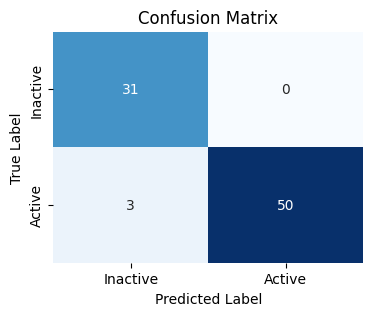

In [51]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_train, Y_train_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [52]:
def plot_roc(Y_train,Y_train_pred):
    fpr,tpr,threshold=roc_curve(Y_train,Y_train_pred)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.4f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

In [53]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

ROC AUC=0.9717


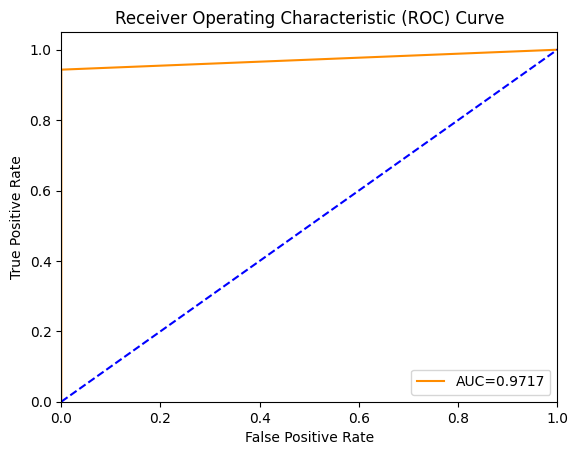

In [54]:
plot_roc(Y_train,Y_train_pred)

In [55]:
## Sensitivity = TP/(TP+FN)
## SPECIFICITY = TN/(TN+FP)
## Positive Predictive Value (PPV) = TP/(TP+FP)
## Negative Predictive Value (NPV) = TN/(TN+FN)
## FPR = FP/(TN+FP)
## NPV = TN/(TN+FN)

In [56]:
cm = confusion_matrix(Y_train, Y_train_pred)

In [57]:
cm

array([[31,  0],
       [ 3, 50]], dtype=int64)

In [58]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [59]:
# Print Confusion Matrix
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 31
TN: 50
FP: 0
FN: 3


In [60]:
## Sensitivity = TP/(TP+FN)
Sensitivity = TP/(TP+FN)

In [61]:
Sensitivity

0.9117647058823529

In [62]:
## SPECIFICITY = TN/(TN+FP)
SPECIFICITY = TN/(TN+FP)

In [63]:
SPECIFICITY

1.0

In [64]:
## Positive Predictive Value (PPV) = TP/(TP+FP)
PPV = TP/(TP+FP)


In [65]:
PPV

1.0

In [66]:
## Negative Predictive Value (NPV) = TN/(TN+FN)
NPV = TN/(TN+FN)


In [67]:
NPV

0.9433962264150944

In [68]:
## False Positive Rate (FPR) = FP/(TN+FP)
FPR = FP/(TN+FP)

In [69]:
FPR

0.0

In [70]:
accuracy = (TP+TN)/(TP+TN+FP+FN)

In [71]:
accuracy

0.9642857142857143

In [72]:
def calculate_tpr_fpr(Y_train, Y_train_pred):
  cm = confusion_matrix(Y_train, Y_train_pred)
  TP = cm[0, 0]
  TN = cm[1, 1]
  FP = cm[0, 1]
  FN = cm[1, 0]


  tpr =  TP/(TP + FN)
  fpr = 1 - TN/(TN+FP)

  return tpr, fpr

In [73]:
fpr, tpr, thresholds = roc_curve(Y_train, Y_train_pred)
auc(fpr, tpr)

0.9716981132075472

**PERFORMANCE METRICS FOR TEST DATA**

In [74]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.92      0.75      0.83        16

    accuracy                           0.76        21
   macro avg       0.71      0.78      0.72        21
weighted avg       0.82      0.76      0.78        21



In [75]:
def evaluate_classifier(Y_test, Y_test_pred):
  print(f"Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
  print(f"Precision: {precision_score(Y_test, Y_test_pred):.4f}")
  print(f"Recall: {recall_score(Y_test, Y_test_pred):.4f}")
  print(f"ROC AUC: {roc_auc_score(Y_test, Y_test_pred):.4f}")
  print(f"balanced_accuracy: {balanced_accuracy_score(Y_test, Y_test_pred):.4f}")
  print(f"mcc: {matthews_corrcoef(Y_test, Y_test_pred):.4f}")
  print(f"f1: {f1_score(Y_test, Y_test_pred):.4f}")
  print(f"cohen_kappa: {cohen_kappa_score(Y_test, Y_test_pred):.4f}")
  print(f"conf_matrix: {confusion_matrix(Y_test, Y_test_pred)}")

In [76]:
evaluate_classifier(Y_test, Y_test_pred)

Accuracy: 0.7619
Precision: 0.9231
Recall: 0.7500
ROC AUC: 0.7750
balanced_accuracy: 0.7750
mcc: 0.4824
f1: 0.8276
cohen_kappa: 0.4560
conf_matrix: [[ 4  1]
 [ 4 12]]


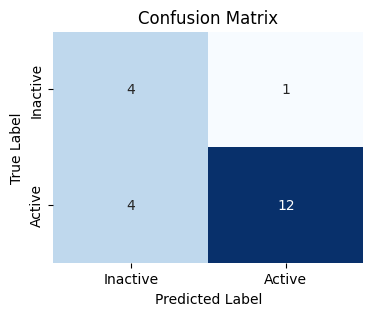

In [77]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [78]:
def plot_roc(Y_test, Y_test_pred):
    fpr,tpr,threshold=roc_curve(Y_test, Y_test_pred)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.4f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

ROC AUC=0.7750


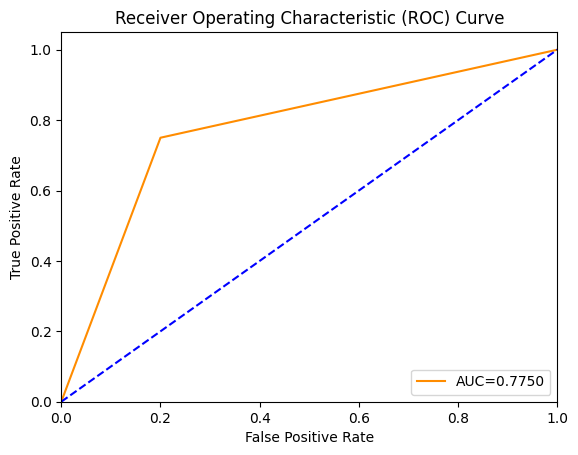

In [79]:
plot_roc(Y_test, Y_test_pred)

In [80]:
## Sensitivity = TP/(TP+FN)
## SPECIFICITY = TN/(TN+FP)
## Positive Predictive Value (PPV) = TP/(TP+FP)
## Negative Predictive Value (NPV) = TN/(TN+FN)
## FPR = FP/(TN+FP)
## NPV = TN/(TN+FN)

In [81]:
cm1 = confusion_matrix(Y_test, Y_test_pred)

In [82]:
cm1

array([[ 4,  1],
       [ 4, 12]], dtype=int64)

In [83]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [84]:
# Print Confusion Matrix
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 31
TN: 50
FP: 0
FN: 3


In [85]:
## Sensitivity = TP/(TP+FN)
Sensitivity = TP/(TP+FN)

In [86]:
Sensitivity

0.9117647058823529

In [87]:
## SPECIFICITY = TN/(TN+FP)
SPECIFICITY = TN/(TN+FP)

In [88]:
SPECIFICITY

1.0

In [89]:
## Positive Predictive Value (PPV) = TP/(TP+FP)
PPV = TP/(TP+FP)

In [90]:
PPV

1.0

In [91]:
## Negative Predictive Value (NPV) = TN/(TN+FN)
NPV = TN/(TN+FN)

In [92]:
NPV

0.9433962264150944

In [93]:
## False Positive Rate (FPR) = FP/(TN+FP)
FPR = FP/(TN+FP)

In [94]:
FPR

0.0

In [95]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
auc(fpr, tpr)

0.7750000000000001

In [96]:
my_param_grid = {'max_depth':[7,8,9], 'min_samples_split':[7,8,9], 'min_samples_leaf': [7,8,9]}

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
GridSearchCV(estimator=DecisionTreeClassifier(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [7, 8, 9],
                         'min_samples_split': [7, 8, 9]},
             verbose=3)

In [99]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [100]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.706 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.647 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.706 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.706 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.562 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=0.706 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=0.647 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=0.706 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=0.706 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=7, m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [7, 8, 9],
                         'min_samples_split': [7, 8, 9]},
             verbose=3)

In [101]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 7}

In [102]:
Y_test_optimised = grid.predict(X_test)

In [103]:
Y_test_optimised

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [104]:
predictions1['Y_test_optimised'] = Y_test_optimised
predictions1.head()

,Y_test,Y_test_pred,Y_test_optimised
65,1,1,1
35,0,0,0
42,1,1,1
93,1,0,0
38,1,1,1


**PERFORMANCE METRICS FOR OPTIMIZED DATA**

In [105]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_optimised))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.93      0.81      0.87        16

    accuracy                           0.81        21
   macro avg       0.75      0.81      0.77        21
weighted avg       0.84      0.81      0.82        21



In [106]:
def evaluate_classifier(Y_test, Y_test_optimised):
  print(f"Accuracy: {accuracy_score(Y_test, Y_test_optimised):.4f}")
  print(f"Precision: {precision_score(Y_test, Y_test_optimised):.4f}")
  print(f"Recall: {recall_score(Y_test, Y_test_optimised):.4f}")
  print(f"ROC AUC: {roc_auc_score(Y_test, Y_test_optimised):.4f}")
  print(f"balanced_accuracy: {balanced_accuracy_score(Y_test, Y_test_optimised):.4f}")
  print(f"mcc: {matthews_corrcoef(Y_test, Y_test_optimised):.4f}")
  print(f"f1: {f1_score(Y_test, Y_test_optimised):.4f}")
  print(f"cohen_kappa: {cohen_kappa_score(Y_test, Y_test_optimised):.4f}")
  print(f"conf_matrix: {confusion_matrix(Y_test, Y_test_optimised)}")

In [107]:
evaluate_classifier(Y_test, Y_test_optimised)

Accuracy: 0.8095
Precision: 0.9286
Recall: 0.8125
ROC AUC: 0.8063
balanced_accuracy: 0.8063
mcc: 0.5534
f1: 0.8667
cohen_kappa: 0.5385
conf_matrix: [[ 4  1]
 [ 3 13]]


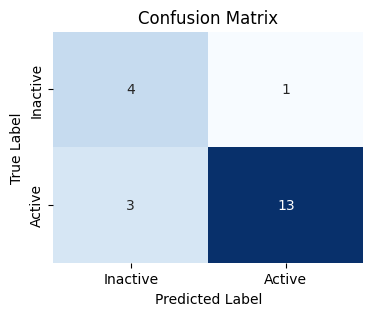

In [108]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_test_optimised)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_dtc.png', dpi=300, bbox_inches='tight')  
plt.show()

In [109]:
def plot_roc(Y_test, Y_test_optimised):
    fpr,tpr,threshold=roc_curve(Y_test, Y_test_optimised)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.4f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.savefig('roccurve_dtc.png', dpi=300, bbox_inches='tight')  

    plt.show()

ROC AUC=0.8063


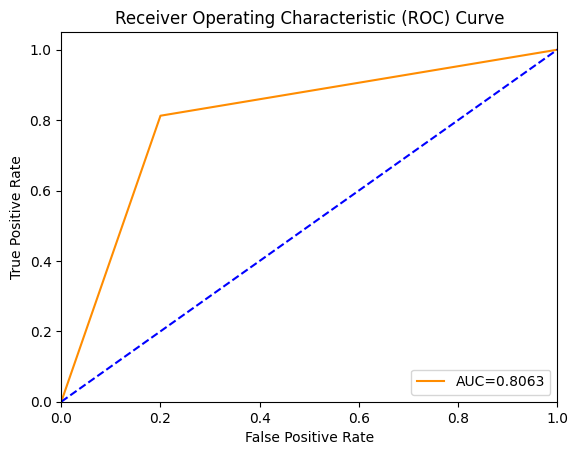

In [110]:
plot_roc(Y_test, Y_test_optimised)

In [111]:
## Sensitivity = TP/(TP+FN)
## SPECIFICITY = TN/(TN+FP)
## Positive Predictive Value (PPV) = TP/(TP+FP)
## Negative Predictive Value (NPV) = TN/(TN+FN)
## FPR = FP/(TN+FP)
## NPV = TN/(TN+FN)

In [112]:
cm1 = confusion_matrix(Y_test, Y_test_optimised)

In [113]:
cm1

array([[ 4,  1],
       [ 3, 13]], dtype=int64)

In [114]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [115]:
# Print Confusion Matrix
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 31
TN: 50
FP: 0
FN: 3


In [116]:
## Sensitivity = TP/(TP+FN)
Sensitivity = TP/(TP+FN)

In [117]:
Sensitivity

0.9117647058823529

In [118]:
## SPECIFICITY = TN/(TN+FP)
SPECIFICITY = TN/(TN+FP)

In [119]:
SPECIFICITY

1.0

In [120]:
## Positive Predictive Value (PPV) = TP/(TP+FP)
PPV = TP/(TP+FP)

In [121]:
PPV

1.0

In [122]:
## Negative Predictive Value (NPV) = TN/(TN+FN)
NPV = TN/(TN+FN)

In [123]:
NPV

0.9433962264150944

In [124]:
## False Positive Rate (FPR) = FP/(TN+FP)
FPR = FP/(TN+FP)

In [125]:
FPR

0.0

In [126]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_optimised)
auc(fpr, tpr)

0.8062500000000001